In [160]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def gaussian_kernel(size, sigma):
    # kernel size has to be odd
    if size % 2 == 0:
        size += 1   
    
    max_point = size // 2
    min_point = -max_point

    kernel = np.zeros((size, size))
    for x in range(min_point, max_point + 1):
        for y in range(min_point, max_point + 1):
            value = 1/ (2 * np.pi * sigma**2) * np.exp(-(x**2 + y**2) / (2 * sigma**2)) 
            kernel[x - min_point, y - min_point] = value

    # Normalize the kernel to ensure the sum of all values is 1
    return kernel / np.sum(kernel)

In [161]:
im = cv2.imread('dataset/2.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
print(im.shape)

(1836, 3264, 3)


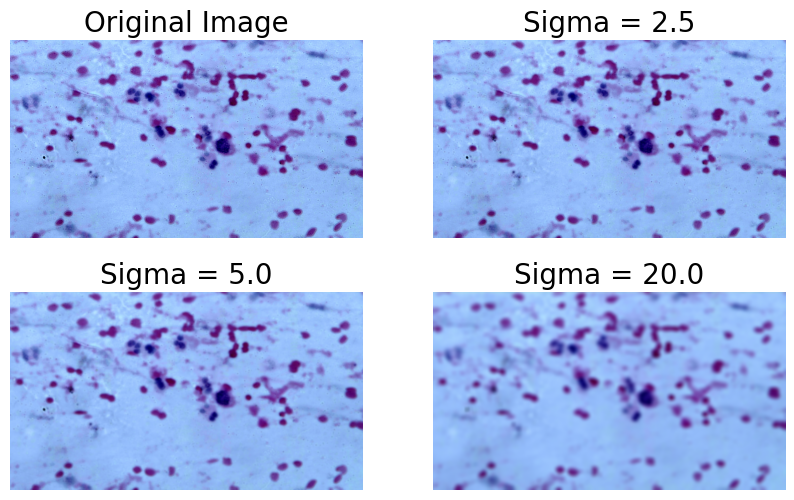

In [162]:
sigmas = [2.5, 5.0, 20.0]
kernel_size = 51
plt.figure(figsize=(10, 6))
plt.subplot(221)
plt.imshow(im)
plt.title('Original Image', fontsize=20)
plt.axis('off')

for i, sigma in enumerate(sigmas):
    kernel = gaussian_kernel(kernel_size, sigma)
    # im_gaussian = cv2.filter2D(im, -1, kernel)
    im_gaussian = np.zeros_like(im)
    for channel in range(3):
        im_gaussian[:, :, channel] = cv2.filter2D(im[:, :, channel], -1, kernel)
    plt.subplot(2, 2, i + 2)
    plt.imshow(im_gaussian)
    plt.title(f'Sigma = {sigma}', fontsize=20)
    plt.axis('off')

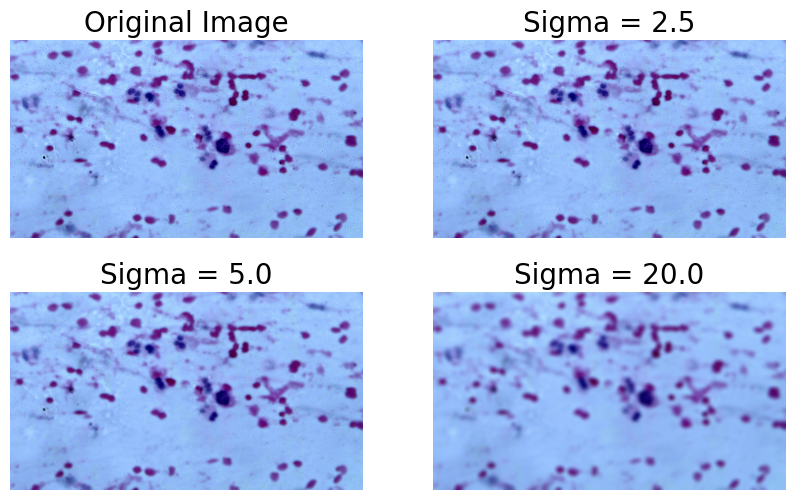

In [163]:
plt.figure(figsize=(10, 6))
plt.subplot(221)
plt.imshow(im)
plt.title('Original Image', fontsize=20)
plt.axis('off')

for i, sigma in enumerate(sigmas):
    im_gaussian = cv2.GaussianBlur(im, (kernel_size, kernel_size), sigma)
    plt.subplot(2, 2, i + 2)
    plt.imshow(im_gaussian)
    plt.title(f'Sigma = {sigma}', fontsize=20)
    plt.axis('off')